<a href="https://colab.research.google.com/github/daje0601/pandas_study/blob/main/3.%20%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D(Cluster_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

### 1. 자카드 유사도(Jaccard Similarity)
 -. 자카드 유사도는 별도의 라이브러리가 존재하지 않아 만들어서 사용토록 하겠습니다. 
  

In [1]:
import nltk
nltk.download("punkt")
nltk.download("wordnet")

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [6]:
def jaccard_similarity(doc1, doc2):
  # 각 문서에서 워드를 뽑아서 리스트로 가지고 있어야한다. 
  lemmatizer = WordNetLemmatizer()

  # tokenizer를 통해서 단어를 하나씩 가지고 온다. 
  # 그러나, 모든 문자를 소문자 처리를 하기 위해서 word.lower()를 사용하고 
  # steming보다는 lemmatizer가 분석에 유리하므로 lemmatizer시켜준다. 
  # ※lemmatizer(표제어추출)은 단어들이 다른 형태(과거형, 진행형 등)를 가지더라도, 그 뿌리 단어를 찾아가서 단어의 개수를 줄이는 것을 말한다. 
  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(doc1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(doc2)]

  # doc1과 doc2의 공통 사용되는 단어를 계산하고 전체 단어를 계산해야한다. 
  # 여기서 set을 사용하였는데, set은 중복을 허용하지 않고, Unordered한 특징이 있다. 
  # 또한, 교집합, 합집합, 차집합을 사용할 때 intersection과 union을 통해 매우 쉽게 구할 수 있다. 
  # 자세한 사항은 링크를 참조 하시면 된다. https://wikidocs.net/1015

   # doc1과 doc2의 공통 사용되는 단어 찾기 ( 교집합 )
  inter = len(set(words1).intersection(set(words2)))
  # 전체 갯수 구하기  
  union = len(set(words1).union(set(words2)))

  return inter/union

In [7]:
doc1 = "Think like a man of action and act like man of thought."
doc2 = "Try no to become a man of success but rather try to become a man of value."
doc3 = "Give me liberty, of give me death"

print(jaccard_similarity(doc1, doc2))
print(jaccard_similarity(doc1, doc3))
print(jaccard_similarity(doc2, doc3))

0.2222222222222222
0.06666666666666667
0.058823529411764705


### 2. CosineSimilarity 
-. 코사인 유사도란?
 * 벡터와 벡터 간의 유사도를 비교할 때 두 벡터 간의 사잇각을 구해서 얼마나 유사한지 수치로 나타낸 것입니다.  
    
 * 위 설명처럼 벡터와 벡터 간의 유사도를 구하기 때문에 문서들을 벡터화해주는 작업이 꼭 필요하다.   

-. CosineSimilarity 특징

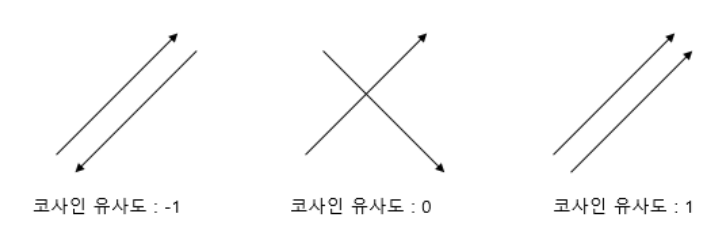

-. CosineSimilarity 공식

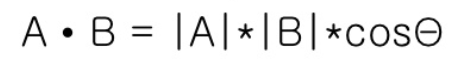

-. CosineSimilarity 장점

 * 유클리드 거리 기반 지표의 단점을 극복할 수 있다. 
 * 희소 행렬에서 문서와 문서 벡터 간의 거리에 기반한 유사도 지표는 정확도가 떨어집니다.
 * 또한 문서가 매우 긴 경우 단어의 빈도수 또한 많기 때문에 빈도수에만 기반해서 유사도를 구하는 것은 공정한 비교가 될 수 없습니다.
 * 예를 들어 A 문서에서 '경제'라는 단어가 5번 나왔고, B 문서에서 '경제'라는 단어가 3번 언급되었다고 A가 경제와 더 밀접한 문서라고 볼 수 없습니다. A 문서의 길이가 B 문서의 길이보다 10배 이상 크다면 오히려 B 문서가 경제와 더 관련이 있다고 판단해야 옳을 것입니다. 따라서 문서 간 유사도를 측정할 때는 코사인 유사도가 가장 많이 쓰입니다. 
 * 출처 : https://bkshin.tistory.com/entry/NLP-8-%EB%AC%B8%EC%84%9C-%EC%9C%A0%EC%82%AC%EB%8F%84-%EC%B8%A1%EC%A0%95-%EC%BD%94%EC%82%AC%EC%9D%B8-%EC%9C%A0%EC%82%AC%EB%8F%84

In [12]:
tiv = TfidfVectorizer()
corpus = [doc1, doc2, doc3]

# corpus를 transform하여 벡터화하고 todense로 받아온다. 
tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


## 한국어 형태소 분석기 설치

In [13]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 27.9MB/s 
     |████████████████████████████████| 460kB 37.7MB/s 
     |████████████████████████████████| 92kB 10.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [14]:
!curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
/etc/os-release:NAME="Ubuntu"
/etc/os-release:ID=ubuntu
/etc/os-release:ID_LIKE=debian
/etc/os-release:PRETTY_NAME="Ubuntu 18.04.5 LTS"
/etc/os-release:HOME_URL="https://www.ubuntu.com/"
/etc/os-release:SUPPORT_URL="https://help.ubuntu.com/"
/etc/os-release:BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
/etc/os-release:PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
/etc/os

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [29]:
import urllib.request

raw = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt").readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [30]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw :
  reviews.append(i.split('\t')[1])

print(reviews[:3])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.']


In [31]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [32]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm 
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [33]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [34]:
# word2vec을 통해 할 수 있는 것
word2vec.most_similar("영화")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('작품', 0.9650911688804626),
 ('이야기', 0.9544569253921509),
 ('듯', 0.9488793611526489),
 ('마음', 0.9468773603439331),
 ('모습', 0.9429988265037537),
 ('표현', 0.9401639103889465),
 ('순수', 0.9400253295898438),
 ('인간', 0.9398574829101562),
 ('연애', 0.9387773871421814),
 ('잔잔', 0.9387076497077942)]

* t-sne을 이용한 단어 벡터 시각화

In [45]:
tsne = TSNE(n_components=2)
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [46]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]

import pandas as pd

transform_similarity = tsne.fit_transform(similarity)
# 여기서 columns를 왜 x,y로 설정해놓았는지 궁금해 할 수 있을 것 같네요
# 일단, TSNE에서 components를 2차원으로 설정해둔 거 기억나시죠?
# 만약 3으로 components로 설정했다면, z까지 넣어야겠지요 
# 이들은 일종의 좌표값으로 활용될 수 있고, 이것을 가지고 sns로 그래프를 그러볼 예정이다. 
df = pd.DataFrame(transform_similarity, index=vocab, columns=["x", "y"])
df[:8]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


,x,y
어릴,34.946735,-1.489629
때,20.957840,-45.192383
보,21.149225,-49.517208
고,20.196764,-48.145790
지금,23.455860,-48.076424
다시,21.986609,-48.925358
봐도,23.759106,-48.760868
재밌,31.149298,-51.731491


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


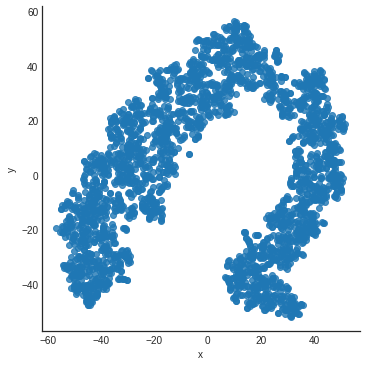

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

# lmplot으로 그래프를 시각화해보았다. 
sns.lmplot("x", "y", data=df, fit_reg=False, size=5)
plt.show();


## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [48]:
from sklearn.cluster import AgglomerativeClustering

#ward로 예측
ward = AgglomerativeClustering(n_clusters=6, linkage="ward")
predict = ward.fit_predict(df)
predict

array([0, 2, 2, ..., 4, 4, 4])

In [49]:
# ward로 예측된 라벨을 dataframe에 저장 -> 추후 시각화 시, 사용예정 
result = df
result["predict"] = predict
result.head(2)

,x,y,predict
어릴,34.946735,-1.489629,0
때,20.957840,-45.192383,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


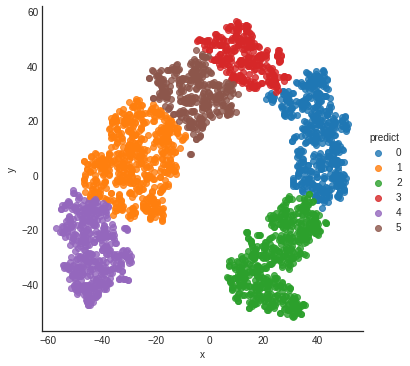

In [51]:
sns.lmplot("x", "y", data=result, fit_reg=False, size=5, hue="predict")
plt.show();

#### average

#### complete

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

### 클러스터 개수 6